# Krittika Convener Selection
## Python Assignment

1. You may find the KSP tutorials useful: https://github.com/krittikaiitb/tutorials - Tutorials 1,2,3, and 4 are particularly relevant. These cover basic python, numpy, functions in python and matplotlib respectively.

2. A helpful reminder that executing a cell with help (for example: help(np.loadtxt) or np.loadtxt?) will show the documentation for that function.

3. The use of internet is completely ALLOWED for solving this assignment.

4. Feel free to use multiple cells for your solutions, this would make your code easier to understand in a step-by-step fashion. But keep them separate for each question (don't use a cell to solve Q1 after Q2).

5. Try to keep your code neat and make use of comments and/or markdown cells to explain what you have done.

In [103]:
# try to put all your imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
import scipy

### Q1: Parsing Form Responses
Suppose that you are a convener and it has been a few months into your tenure. We have organized an event focused at the newly joining freshers(your juniors).

We floated a Google form to collect their details and get them registered. We planned to contact them all via WebMail to send them details of the event.

While going through the responses, you discover that your co-convener forgot to filter inputs in the form! There appear to be many invalid roll numbers - we cannot contact these students via WebMail. Here are the first few entries:

| Sr. No. | Name | Roll Number | Contact Number |
|---------|------|-------------|----------------|
| 1       | MV   | 220070044   | 986937546      |
| 2       | DV   | 22b280013   | 961101307      |
| 3       | RR   | 21070042    | 908204532      |
| 4       | YB   | 220030019   | 947226579      |

As you can see, we can already see an erroneous LDAP in the $3$rd input.

Your task here is to find out the submissions with wrong roll numbers and filter them out. We would reach out to such people using their contact numbers. Your final output should be the names and contact numbers of these people.

*PS : As you might suspect, this data is sourced from an actual event from our tenure. It has been anonymized and the errors have been exaggerated :)*

In [3]:
file1 = 'Dataset_Q1.csv' #this is the CSV file that countains all the responses

Feel free to use any libraries/standard functions that you might need to solve this problem.

In [23]:
# Solution code
data = pd.read_csv(file1)

def valid_roll(row):
    roll = row["Roll Number"]
    if len(roll) != 9:
        return False
    if roll[0:2] not in ["17", "18", "19", "20", "21", "22"]:
        return False
    return True

errors = data[~data.apply(valid_roll, axis = 1)]

cleaned_data = data[data.apply(valid_roll, axis = 1)]

errors

,Sr. No.,Name,Roll Number,Contact Number
2,3,RR,21070042,908204532
8,9,KA,22D070027,909372264
10,11,BP,2230100228,980849718
16,17,AP,22D170020,932737329
20,21,SP,22026005,936914944
31,32,JS,21070024,979691534
48,49,PM,20350117,996497703
55,56,VN,2200700008,918746674
59,60,SN,2241800005,902766352
63,64,AR,22026008,992993873


#### Bonus part:
Amongst the valid entries, what proportion are actually freshers? Remember that we intended to target them with this event. The majority seem to be freshers but you will also find some second and third year students. You can identify each of these groups by the first two digits of their roll numbers. 

Your task is to graphically depict the number of applicants across the three batches.

In [66]:
# Solution code
def get_year(row):
    roll = row["Roll Number"]
    year = roll[0:2]
    if year == "22":
        return 1
    if year == "21":
        return 2
    if year == "20":
        return 3

years = np.array(cleaned_data.apply(get_year, axis = 1))
years

array([1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1])

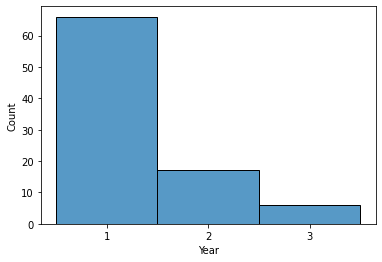

In [83]:
seaborn.histplot(data=years, discrete=True)
plt.xticks([1,2,3])
plt.xlabel("Year")
plt.show()

### Q2: A New Discovery
During one of our regular stargazing sessions, you and your co-conveners discover a new blip of light that shouldn't be there. After examining it a bit, you realise that this object is not quite like anything the world has seen before. You share your data with club seniors and make a startling find - its the first of its kind of a completely new class of objects. An ex-secy of the club, Siddhant Tripathy, analyses it extensively and declares that its actually the first ever **endoplanet** to be found. You and your team are now international celebrities, but its time to organise an event so that people from insti can see this.

Your task is to find out when exactly Tripps' endoplanet would be at its brightest and organise a stargazing session on that date so that everyone can see it for themselves. You have data from a month of observations of this object and you need to extrapolate it to find the peak.

In [85]:
file2 = 'Dataset_Q2.csv'

According to your analysis, this object is in a special orbit that gives it a roughly Gaussian light curve i.e. the plot of [magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude) v/s time roughly follows an inverted Gaussian function. Recall that a generic Gaussian function with unit amplitude is given by

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left({-\frac{1}{2}{\left(\frac{x-\mu}{\sigma}\right)}^2}\right)$$ 

where $\mu$ is the mean of the distribution it describes and $\sigma$ is the standard deviation. More about it [here](https://archive.lib.msu.edu/crcmath/math/math/g/g087.htm).

Your task is to find the date at which the endoplanet will be at it's brightest, along with how bright its expected to be. Also plot the original data along with the fitted curve.

You can do this by fitting a gaussian to the light curve data and locating its extremum. You may find `scipy.optimize.curve_fit` useful. 

**Important** : Our fit function must be a Gaussian with a vertical offset. The problem is that `curve_fit` tends to misbehave in this particular example when you ask it to guess that offset, so assume it to be $9.0$ to solve this problem. This, of course, implies that the baseline magnitude of the object is $9.0$

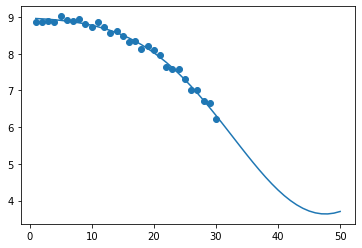

47.610541624979355

In [147]:
# Solution code
data = pd.read_csv(file2)

night_nos = np.array(data["Night No."])
magnitudes = np.array(data["Magnitude"])
plt.scatter(night_nos, magnitudes)

def inv_gaussian(x, sigma, mu, amp):
    return 9 - amp*1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x-mu)/sigma)**2)

params, cov = scipy.optimize.curve_fit(
        inv_gaussian, 
        xdata= night_nos, 
        ydata=magnitudes)
    
# params=[3,3]
plt.plot(np.linspace(1, 50), inv_gaussian(np.linspace(1, 50), *params))
plt.show()

params[1]

In [149]:
np.sqrt(np.diag(cov))

array([ 1.8845036 ,  6.21306681, 91.73801224])

#### Bonus part:

Can this date be trusted? We wouldn't want to claim the endoplanet is the brightest on a particular day and then have it brighten up even more later. Try to ascertain the error in this predicted date. Read the documentation of `curve_fit` and try to understand the statistical significance of the quantities it returns.

In [ ]:
# Solution code
